# Neural Network

## Setup

### Run the Data Preprocessing notebook once to import the get_data method

In [310]:
%run data_preprocessing.ipynb

### Run the Data Evaluation notebook once to import the show_evaluation method

In [311]:
%run data_evaluation.ipynb

### Imports

In [312]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense

### Hyperparmeters

In [313]:
# for get_data
handle_missing_values = 'uu'
use_one_hot_encoding = True
split_size = (0.6, 0.2, 0.2)

# for the DummyClassifier
strategy = 'uniform'

### Get the data

In [314]:
y_train, x_train, y_val, x_val, y_test, x_test = get_data(handle_missing_values, use_one_hot_encoding, split_size)

## Model

### Create the model

In [315]:
classifier = Sequential()

classifier.add(Dense(8, activation='relu', input_shape=(x_train.shape[1],)))
classifier.add(Dense(32, activation='relu', input_shape=(x_train.shape[1],)))
classifier.add(Dense(8, activation='relu', input_shape=(x_train.shape[1],)))
classifier.add(Dense(1, activation='sigmoid'))

classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 8)                 936       
_________________________________________________________________
dense_68 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_69 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_70 (Dense)             (None, 1)                 9         
Total params: 1,497
Trainable params: 1,497
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [316]:
history = classifier.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=5,
    validation_data=(x_val, y_val)
)

Train on 4874 samples, validate on 1625 samples
Epoch 1/5
4874/4874 [==============================] - 1s 215us/step - loss: 0.4672 - acc: 0.8098 - val_loss: 0.1931 - val_acc: 0.9354
Epoch 2/5
4874/4874 [==============================] - 0s 19us/step - loss: 0.0872 - acc: 0.9783 - val_loss: 0.0413 - val_acc: 0.9951
Epoch 3/5
4874/4874 [==============================] - 0s 18us/step - loss: 0.0212 - acc: 0.9979 - val_loss: 0.0184 - val_acc: 0.9957
Epoch 4/5
4874/4874 [==============================] - 0s 18us/step - loss: 0.0099 - acc: 0.9988 - val_loss: 0.0105 - val_acc: 0.9988
Epoch 5/5
4874/4874 [==============================] - 0s 18us/step - loss: 0.0059 - acc: 0.9994 - val_loss: 0.0072 - val_acc: 0.9988


## Evaluation

### Predict the test set

In [317]:
y_prob = classifier.predict(x_test)
y_pred = np.round(y_prob)

### Apply the evaluation metrics

Precision Score:
1.0

Recall Score:
0.9961439588688946

F1-Score:
0.9980682549903414

Confusion Matrix:

         Ediable Poisonous
Ediable       TN        FP
Poisnous      FN        TP

          Ediable  Poisonous
Ediable       847          0
Poisnous        3        775



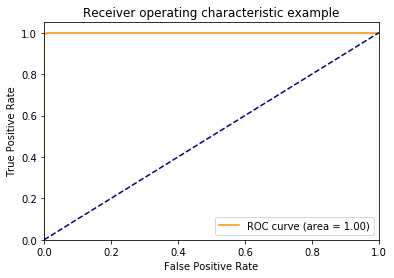


ROC Score:
0.999965096833524


In [318]:
show_evaluation(y_test, y_pred, y_prob)

In [319]:
x_train.shape

(4874, 116)

In [320]:
x_val.shape

(1625, 116)

In [321]:
x_test.shape


(1625, 116)